# Project brief


Zomato, an Indian multinational company, serves as both a restaurant aggregator and a food delivery service. Founded by Deepinder Goyal and Pankaj Chaddah in 2008, Zomato offers detailed information, menus, and user reviews of restaurants, along with food delivery services from partner establishments across more than 1,000 cities and towns in India, as of 2022–2023. The platform has an average of 17.5 million monthly transacting customers for its food delivery service. Additionally, the number of active restaurant partners on Zomato's platform for food delivery has grown by 8.7% year-on-year, increasing from 208,000 to 226,000.


The objective of this project is to derive data-driven insights from Zomato's extensive platform. By analyzing customer transaction patterns, restaurant engagement metrics, and growth trends, the project aims to uncover critical insights that could help optimize the platform's performance. This includes understanding customer behavior, identifying top-performing restaurants, evaluating market penetration, and suggesting strategies for enhancing customer satisfaction and expanding Zomato's footprint in the competitive food delivery market.

# Import all the libraries 

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
zomato = pd.read_csv("Zomato data .csv")  ## loading the data

# Data cleaning

In [3]:
zomato

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [4]:
zomato.head(10)  ## showing first 10 rows

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
5,Timepass Dinner,Yes,No,3.8/5,286,600,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,800,Buffet
7,Onesta,Yes,Yes,4.6/5,2556,600,Cafes
8,Penthouse Cafe,Yes,No,4.0/5,324,700,other
9,Smacznego,Yes,No,4.2/5,504,550,Cafes


In [5]:
zomato.isnull().sum()  ## Checking for null values 

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [6]:
zomato.shape

(148, 7)

In [7]:
zomato.rename(columns={'approx_cost(for two people)': 'approx_cost'}, inplace=True)  ## rename the coloum

In [8]:
def fixrate(value):                               ## fixing the rate column
    value = str(value).split('/')
    value = value[0]
    return float(value)



zomato['rate'] = zomato['rate'].apply(fixrate)
print(zomato.head(5))

                    name online_order book_table  rate  votes  approx_cost  \
0                  Jalsa          Yes        Yes   4.1    775          800   
1         Spice Elephant          Yes         No   4.1    787          800   
2        San Churro Cafe          Yes         No   3.8    918          800   
3  Addhuri Udupi Bhojana           No         No   3.7     88          300   
4          Grand Village           No         No   3.8    166          600   

  listed_in(type)  
0          Buffet  
1          Buffet  
2          Buffet  
3          Buffet  
4          Buffet  


In [9]:
zomato

,name,online_order,book_table,rate,votes,approx_cost,listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


In [10]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             148 non-null    object 
 1   online_order     148 non-null    object 
 2   book_table       148 non-null    object 
 3   rate             148 non-null    float64
 4   votes            148 non-null    int64  
 5   approx_cost      148 non-null    int64  
 6   listed_in(type)  148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


# EDA

### Majority of the customers are ordered from which type of resturants

In [11]:
zomato.columns


Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'approx_cost',
       'listed_in(type)'],
      dtype='object')

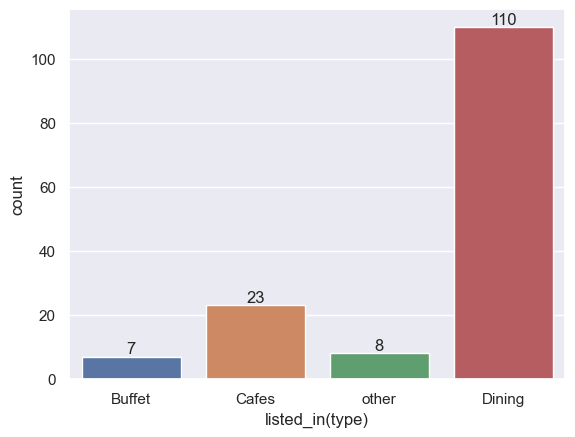

In [12]:
type_of_resturent= sns.countplot(x=zomato['listed_in(type)'], data =zomato)

for bars in type_of_resturent.containers:
    type_of_resturent.bar_label(bars)

It can be stated from the above graph that, majority of the custoemers are prefferred dinning as their first choice and maximum of them are avoid the buffet. 

### Votes recieved for the resturants 

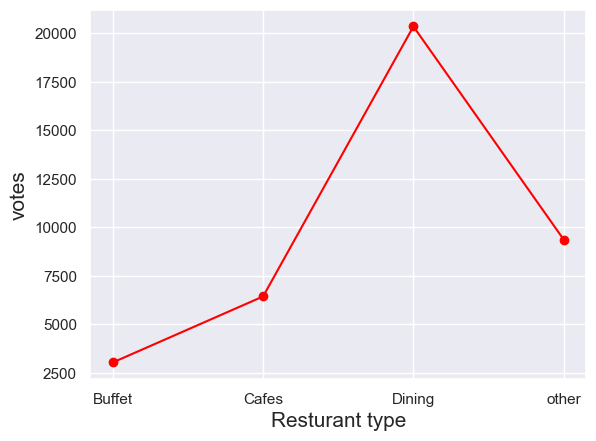

In [13]:
grouped_data = zomato.groupby('listed_in(type)') ['votes'].sum()
graph = pd.DataFrame({'votes' : grouped_data}) 
plt.plot(graph, c= 'red', marker= 'o')
plt.xlabel("Resturant type", size = 15)
plt.ylabel("votes", size = 15)
plt.show()

In [14]:
vote_resturant  = zomato.groupby([zomato['listed_in(type)']],as_index=False).votes.sum().sort_values(by='votes',ascending= False)

In [15]:
vote_resturant

,listed_in(type),votes
2,Dining,20363
3,other,9367
1,Cafes,6434
0,Buffet,3028


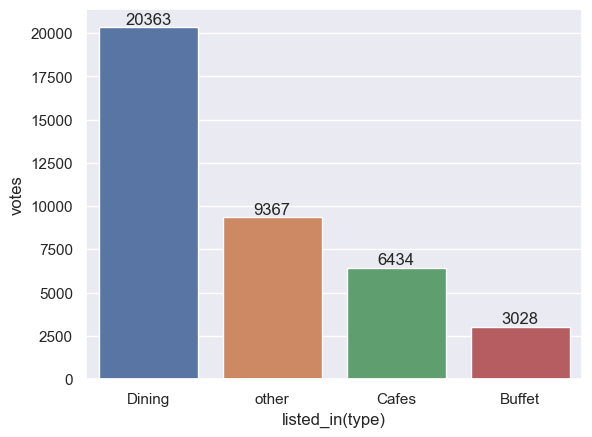

In [16]:
vote_resturant_graph = sns.barplot(x='listed_in(type)', y='votes', data =vote_resturant)

for bars in vote_resturant_graph.containers:
    vote_resturant_graph.bar_label(bars)

Dining type of resturant has got majority of the votes from the customers and buffet got lowest votes

### Ratings that are received by the majority of restaurants 

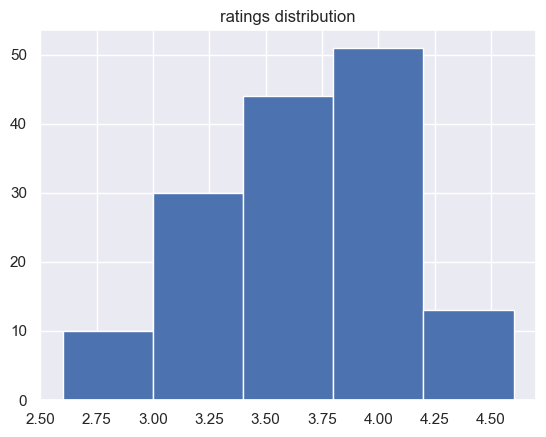

In [17]:
plt.hist(zomato['rate'], bins = 5)
plt.title('ratings distribution')
plt.show()

Majority of the resturants has got ratings between 3.5 to 4

###  What is the  spending of the customers on each order?

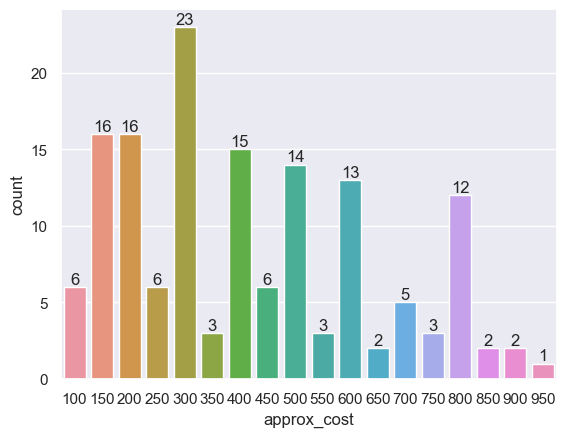

In [18]:

order_amount = sns.countplot(x=zomato['approx_cost'], data = zomato)

for bars in order_amount.containers:
    order_amount.bar_label(bars)

majority of the couple has ordered 300 rupees food 

### What is the average spending on each order?

In [19]:
spend_resturant  = zomato.groupby([zomato['listed_in(type)']],as_index=False).approx_cost.mean().sort_values(by=['approx_cost'],ascending= False)
spend_resturant

,listed_in(type),approx_cost
0,Buffet,671.428571
3,other,668.750000
1,Cafes,545.652174
2,Dining,357.272727


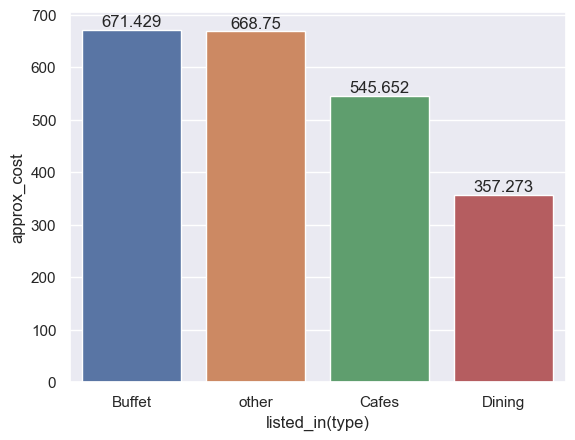

In [20]:
spend_resturant_graph = sns.barplot(x='listed_in(type)', y='approx_cost', data =spend_resturant)

for bars in spend_resturant_graph.containers:
    spend_resturant_graph.bar_label(bars)

It says buffet has the highest average spending and dining has the lowset average spending

### Which mode (online or offline) has received the maximum rating?

In [21]:
zomato.head()

,name,online_order,book_table,rate,votes,approx_cost,listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='online_order', ylabel='rate'>

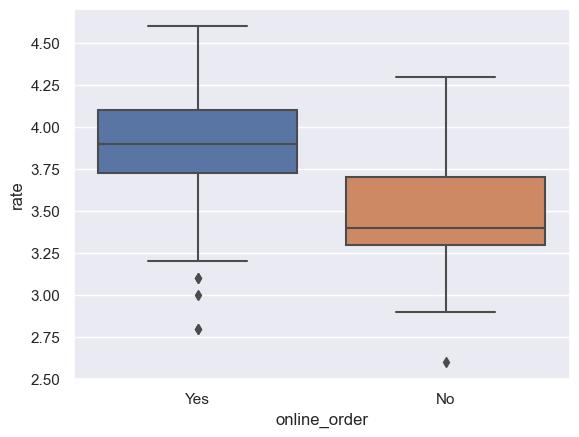

In [22]:
sns.boxplot(x=zomato['online_order'], y= zomato['rate'], data= zomato)

Online custoemers has gave the high rating than the offline custoemers. It shows Zomato has a greater online popularity than offline. 

### Which type of restaurant received more offline orders, so that Zomato can provide customers with some good offers?

In [23]:
pivot_table = zomato.pivot_table(index= 'listed_in(type)', columns = 'online_order', aggfunc = 'size', fill_value = 0 )

In [24]:
pivot_table

online_order,No,Yes
listed_in(type),,
Buffet,3,4
Cafes,8,15
Dining,77,33
other,2,6


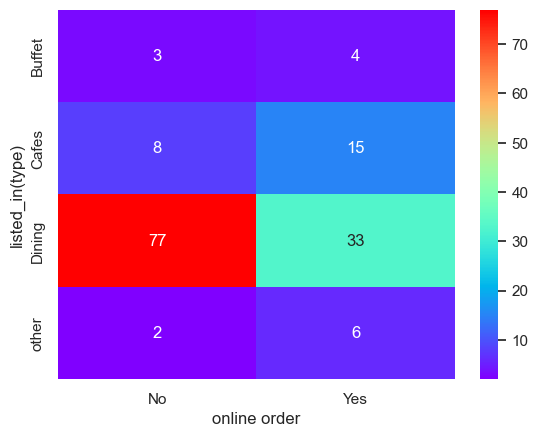

In [25]:
sns.heatmap(pivot_table, cmap= 'rainbow', annot = True, fmt= 'd')
plt.xlabel('online order')
plt.ylabel('listed_in(type)')
plt.show()

The heatmap shows dining has highest offline order 



# Summary

After analyzing the Zomato data, it is evident that the majority of consumers prefer the dining facilities offered by the platform. However, Zomato needs to focus on improving its buffet segment to expand its customer base. The data shows that dining facilities received the highest number of votes, while cafes garnered moderate attention, and the buffet segment received the lowest number of votes from customers. Therefore, it is crucial for Zomato to enhance the offerings and customer service within its buffet segment.

Zomato's restaurants have received an average rating of 3.5 to 4, reflecting the platform's excellent customer service, timely delivery, and quality of food. The majority of customers tend to spend around 300 rupees per order. Notably, the buffet segment has the highest average cost, followed by cafes and dining facilities.

Furthermore, Zomato has received the majority of its ratings from online orders rather than offline orders, indicating that its online presence is more popular among customers. For offline orders, dining facilities have the largest customer base compared to cafes and buffets.

Overall, while Zomato has established a strong reputation in online orders and dining facilities, there is room for improvement in its buffet offerings to attract a broader customer base.